In [ ]:
from google.colab import files
info = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Advertising.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


=>  the average TV ad spending is much higher than radio or newspaper.

In [ ]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

=> no missing data to handle in this dataset

In [ ]:
df.shape

(200, 4)

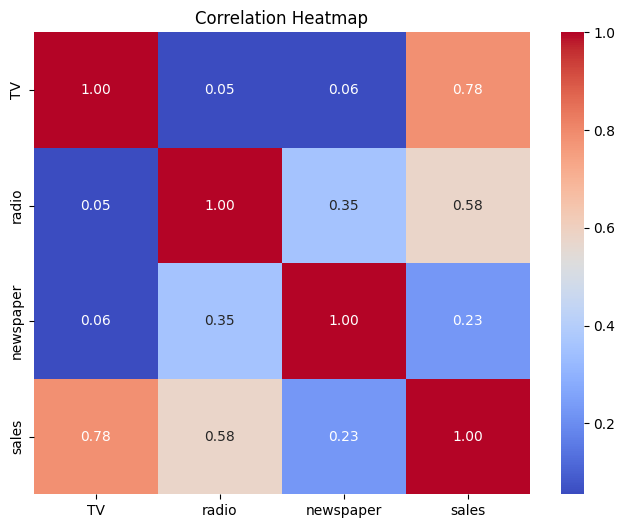

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

=> A high positive correlation is observed between 'TV' spending and 'sales' (0.78), and a moderate positive correlation between 'radio' spending and 'sales' (0.58). 'Newspaper' shows a much weaker correlation with 'sales' (0.23). There's also very little correlation between the spending channels themselves, except perhaps a slight one between radio and newspaper. This suggests TV and radio spending are likely important predictors for sales.

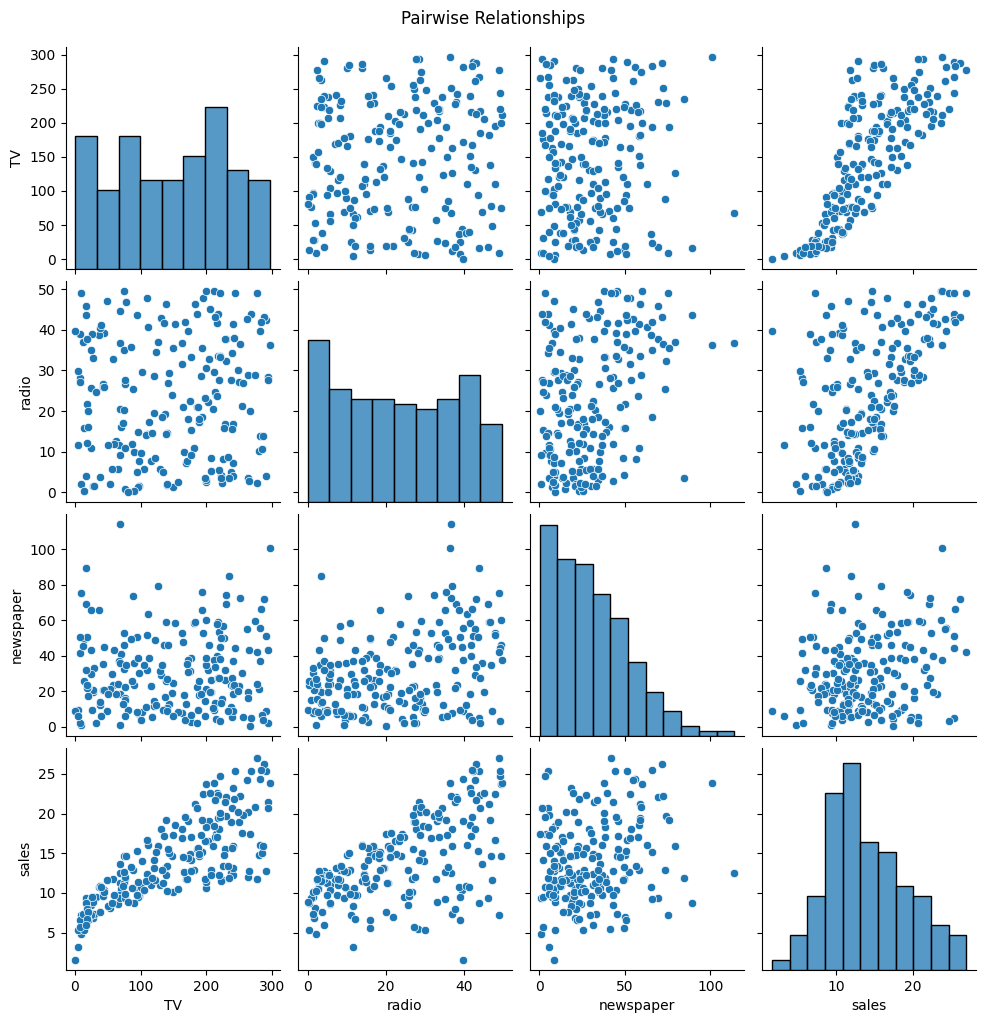

In [ ]:
# Pairplot
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

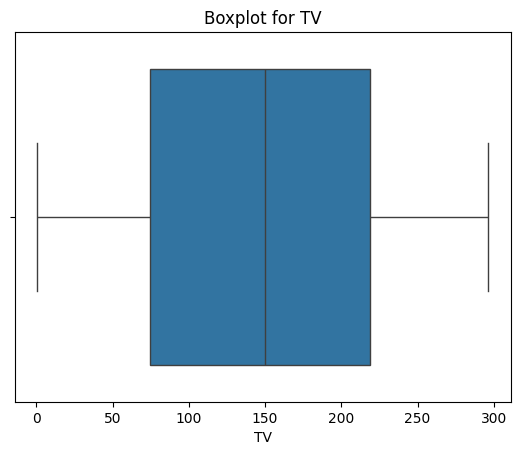

In [ ]:
sns.boxplot(x=df['TV'])
plt.title("Boxplot for TV")
plt.show()

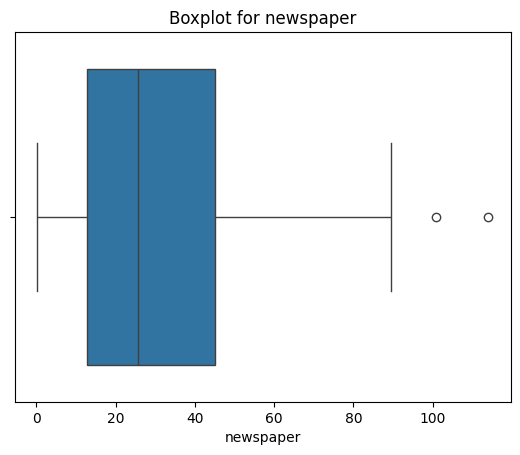

In [ ]:
sns.boxplot(x=df['newspaper'])
plt.title("Boxplot for newspaper")
plt.show()

=> "newspaper" have outliers

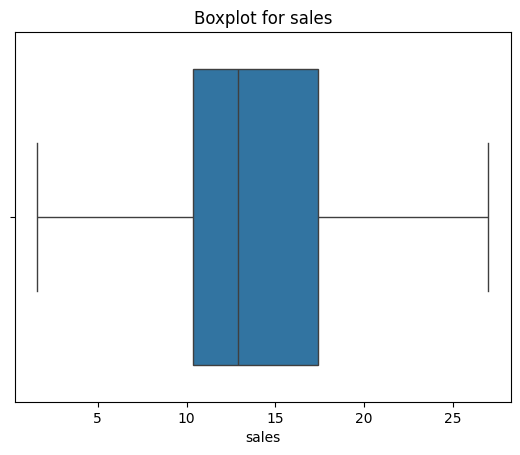

In [ ]:
sns.boxplot(x=df['sales'])
plt.title("Boxplot for sales")
plt.show()

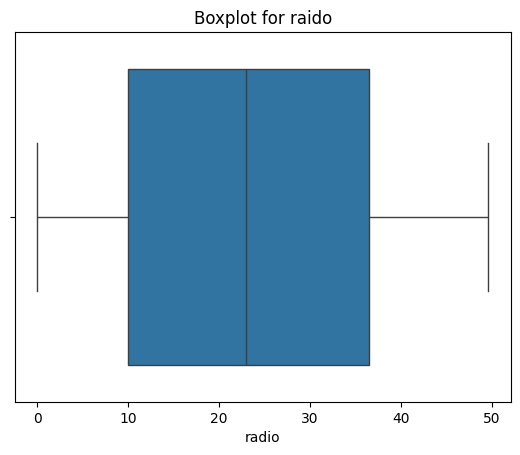

In [ ]:
sns.boxplot(x=df['radio'])
plt.title("Boxplot for raido")
plt.show()

In [ ]:
def remove_outliers_iqr(data, columns, factor=1.5):
    """Removes outliers from specified columns using the IQR method."""
    data_cleaned = data.copy()
    for col in columns:
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]
    return data_cleaned

In [ ]:
# Split data and remove outliers from the training set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train_cleaned = remove_outliers_iqr(df_train.copy(), ['TV', 'radio', 'newspaper'])

X_train_cleaned = df_train_cleaned.drop(columns=['sales'])
y_train_cleaned = df_train_cleaned['sales']
X_test = df_test.drop(columns=['sales'])
y_test = df_test['sales']

Model Training and Evaluation (using cross-validation)

In [ ]:
#Linear Regression
lin_reg = LinearRegression()
rmse_scores_lin = -cross_val_score(lin_reg, X_train_cleaned, y_train_cleaned,
                                    scoring="neg_root_mean_squared_error", cv=10)

print("Linear Regression")
print("rmse_scores:", rmse_scores_lin)
print("rmse_scores.mean(), rmse_scores.std():", rmse_scores_lin.mean(), rmse_scores_lin.std())
print("\n")

Linear Regression
rmse_scores: [2.3598646  1.69109391 1.43558994 1.03286833 1.30121627 1.60004721
 1.69314141 1.4650827  2.71327309 1.26930825]
rmse_scores.mean(), rmse_scores.std(): 1.65614857105984 0.4865920692055575




In [ ]:
#Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
rmse_scores_tree = -cross_val_score(tree_reg, X_train_cleaned, y_train_cleaned,
                                     scoring="neg_root_mean_squared_error", cv=10)

print("Decision Tree")
print("rmse_scores:", rmse_scores_tree)
print("rmse_scores.mean(), rmse_scores.std():", rmse_scores_tree.mean(), rmse_scores_tree.std())
print("\n")

Decision Tree
rmse_scores: [0.79175438 1.89258421 1.42609607 1.22167917 1.59000786 1.07179756
 1.51986842 1.19973956 1.24348301 1.22474487]
rmse_scores.mean(), rmse_scores.std(): 1.3181755105707411 0.2883805182940871




In [ ]:
#Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rmse_scores_rf = -cross_val_score(rf_reg, X_train_cleaned, y_train_cleaned,
                                   scoring="neg_root_mean_squared_error", cv=10)

print("Random Forest")
print("rmse_scores:", rmse_scores_rf)
print("rmse_scores.mean(), rmse_scores.std():", rmse_scores_rf.mean(), rmse_scores_rf.std())
print("\n")

Random Forest
rmse_scores: [0.65751711 0.63985965 0.95656469 0.68568561 0.71467256 0.68312243
 0.56871643 0.78656687 1.32071711 0.54320095]
rmse_scores.mean(), rmse_scores.std(): 0.7556623398357141 0.21807660310239638




Model Testing (using the best model - Decision Tree)

In [ ]:
best_model = tree_reg
best_model.fit(X_train_cleaned, y_train_cleaned)
y_pred_test = best_model.predict(X_test)

test_rmse = mean_squared_error(y_test, y_pred_test)**0.5
test_r2 = r2_score(y_test, y_pred_test)

print("\nBest Model Test Results (Decision Tree)")
print(f"Test Set RMSE: {test_rmse:.4f}")
print(f"Test Set R-squared: {test_r2:.4f}")


Best Model Test Results (Decision Tree)
Test Set RMSE: 1.4631
Test Set R-squared: 0.9322


=>  Represents the proportion of the variance in the test set 'sales' that is predictable from the features. An R2 score close to 1 indicates a good fit. The high R2 score (0.9322) suggests the Decision Tree explains a large portion of the sales variance on unseen data.

Feature Importance (additional)

Random Forest
rmse_scores: [0.65751711 0.63985965 0.95656469 0.68568561 0.71467256 0.68312243
 0.56871643 0.78656687 1.32071711 0.54320095]
rmse_scores.mean(), rmse_scores.std(): 0.7556623398357141 0.21807660310239638




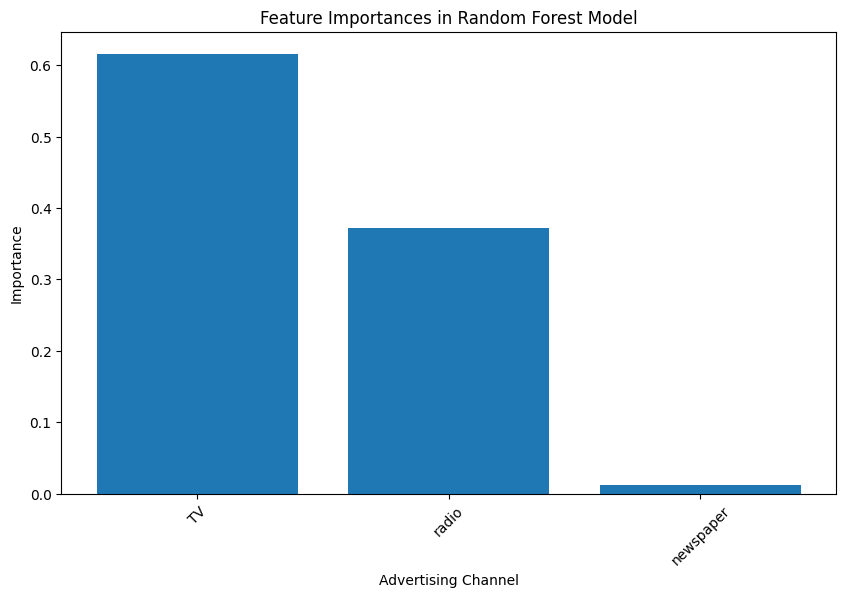

In [ ]:
#Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rmse_scores_rf = -cross_val_score(rf_reg, X_train_cleaned, y_train_cleaned,
                                   scoring="neg_root_mean_squared_error", cv=10)

print("Random Forest")
print("rmse_scores:", rmse_scores_rf)
print("rmse_scores.mean(), rmse_scores.std():", rmse_scores_rf.mean(), rmse_scores_rf.std())
print("\n")

rf_reg.fit(X_train_cleaned, y_train_cleaned)

feature_importances = rf_reg.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train_cleaned.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Advertising Channel')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

=> he plot strongly indicates that 'TV' spending is by far the most important feature for predicting sales in this model, followed by 'radio', with 'newspaper' having very little importance. This aligns with the initial correlation analysis.